In [2]:
# first need to activate espin environment and install netCDF4

from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np

# select lat and long of interest for time series desired

lat_int = 78.2232
long_int = 15.6267

In [3]:
# get netCDF file

ts_file = Dataset('data/ts_Eday_MPI-ESM1-2-LR_lgm_r1i1p1f1_gn_18500101-18691231.nc')

In [4]:
# get array indices at desired location

ts_lat = np.argmin(np.abs(ts_file.variables['lat'][:] - lat_int))
ts_lon = np.argmin(np.abs(ts_file.variables['lon'][:] - (360 + lat_int)))

In [5]:
# extract surface temperature variable as 'ts'

ts = ts_file.variables['ts'][:, ts_lat, ts_lon]

# get timestep

time = ts_file.variables['time'][:]

step = time[-1]/np.shape(time)
print(step, ' days')

[0.99993155]  days


In [6]:
# get temps in degC

ts += -273.15

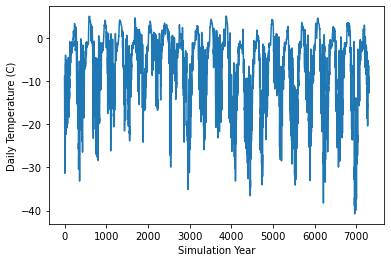

In [7]:
plt.plot(ts)
plt.xlabel('Simulation Year')
plt.ylabel('Daily Temperature (C)')
plt.show()

In [8]:
#np.savetxt('data/ts-midHolo.txt', ts)

time.dtype

dtype('float64')

In [30]:
dt = 0.5
dt_corr = dt/24 # hours to days
time_interp = np.arange(int(time[0]), int(time[-1]), dt_corr)
ts_interp = np.interp(time_interp, time, ts)

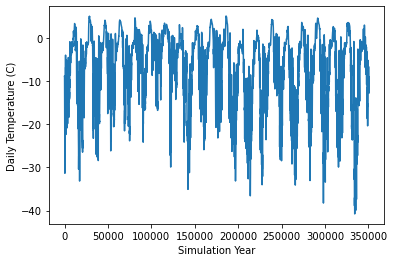

In [31]:
plt.plot(ts_interp)
plt.xlabel('Simulation Year')
plt.ylabel('Daily Temperature (C)')
plt.show()